# A study of classification of images using different Neural Network models
Team Mebers: Srujana Alajangi, Prashanth Kumar Manji

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

### Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train.shape  :', x_train.shape)
print('y_train.shape  :', y_train.shape)
print('x_test.shape   :', x_test.shape)
print('y_test.shape   :', y_test.shape)

x_train.shape  : (50000, 32, 32, 3)
y_train.shape  : (50000, 1)
x_test.shape   : (10000, 32, 32, 3)
y_test.shape   : (10000, 1)


### Plotting first few images

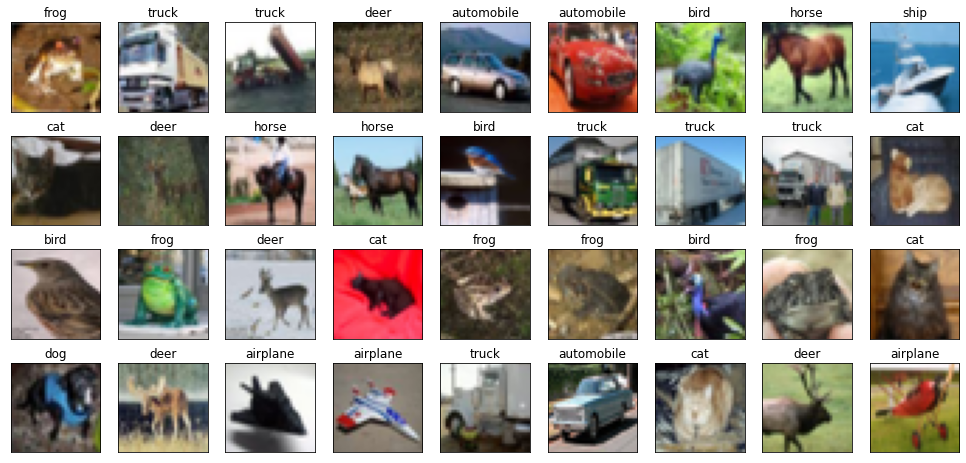

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
          'horse', 'ship', 'truck']

fig, axes = plt.subplots(ncols=9, nrows=4, figsize=(17, 8))
index = 0
for i in range(4):
    for j in range(9):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

### Normalization

In [5]:
# convert from integers to floats
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
# normalize to range 0-1
x_train_norm = x_train_norm / 255.0
x_test_norm = x_test_norm / 255.0

### One-hot encoding

In [6]:
#One-hot encoding the labels
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)
print('the one hot label of the first image is:', y_train_one_hot[0])

the one hot label of the first image is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## CNN Model

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model

In [8]:
input_shape = (32, 32, 3)
num_classes = 10

In [9]:
def CNN_model():
    CNN_model = Sequential()
    CNN_model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same', input_shape=input_shape))
    CNN_model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same'))
    CNN_model.add(MaxPool2D((2, 2)))
    
    CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same'))

    CNN_model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same'))
    CNN_model.add(MaxPool2D((2, 2)))
    CNN_model.add(Dropout(0.25))
    CNN_model.add(Flatten())

    CNN_model.add(Dense(512, activation='relu'))
    CNN_model.add(Dropout(0.5))
    CNN_model.add(Dense(num_classes, activation='softmax'))
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', metrics=['accuracy'])
    return CNN_model

In [10]:
CNN  = CNN_model()

In [11]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [12]:
history = CNN.fit(x_train_norm,y_train_one_hot, batch_size=32,epochs=20, 
               validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 83s 66ms/step - loss: 1.8666 - accuracy: 0.3112 - val_loss: 1.1970 - val_accuracy: 0.5667
Epoch 2/20
1250/1250 [==============================] - 80s 64ms/step - loss: 1.1970 - accuracy: 0.5706 - val_loss: 1.0739 - val_accuracy: 0.6236
Epoch 3/20
1250/1250 [==============================] - 81s 65ms/step - loss: 1.0200 - accuracy: 0.6394 - val_loss: 0.9029 - val_accuracy: 0.6794
Epoch 4/20
1250/1250 [==============================] - 82s 65ms/step - loss: 0.9132 - accuracy: 0.6793 - val_loss: 0.8261 - val_accuracy: 0.7138
Epoch 5/20
1250/1250 [==============================] - 80s 64ms/step - loss: 0.8289 - accuracy: 0.7042 - val_loss: 0.7772 - val_accuracy: 0.7260
Epoch 6/20
1250/1250 [==============================] - 78s 62ms/step - loss: 0.7675 - accuracy: 0.7276 - val_loss: 0.8411 - val_accuracy: 0.7084
Epoch 7/20
1250/1250 [==============================] - 78s 62ms/step - loss: 0.7229 - accuracy: 0.7490 - val_loss: 0.7640 -

### CNN Model Accuracy

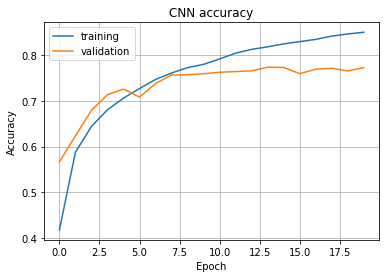

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('CNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### CNN Model Loss

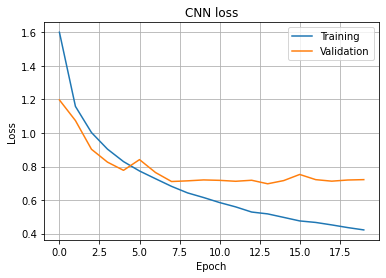

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.grid()
plt.title('CNN loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Training', 'Validation'], loc='upper right') 
plt.show() 

### CNN Predictions

In [18]:
CNN_predictions = CNN.predict(x_test_norm)

In [19]:
CNN_acc = CNN.evaluate(x_test_norm,y_test_one_hot)[1]

313/313 [==============================] - 7s 22ms/step - loss: 0.7398 - accuracy: 0.7654


In [20]:
print('CNN model accuracy on the test data: ',
      CNN_acc*100,'%')

CNN model accuracy on the test data:  76.53999924659729 %


### Confusion Matrix

In [21]:
import numpy as np
CNN_pred_classes = np.argmax(CNN_predictions,axis = 1) 

In [22]:
from sklearn.metrics import confusion_matrix
CNN_cm = confusion_matrix(y_test, CNN_pred_classes)

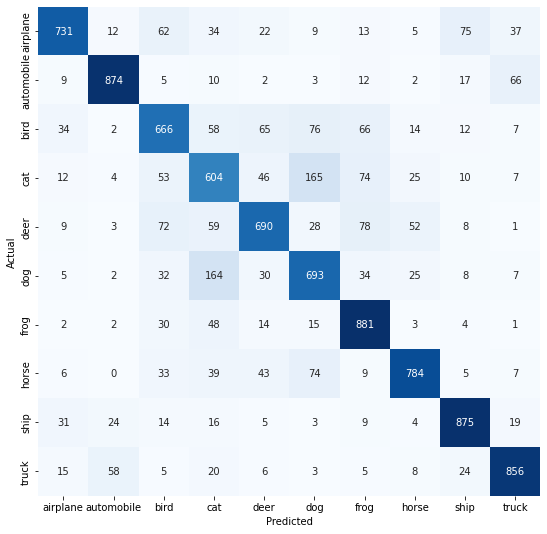

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(CNN_cm, cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt='d', annot=True, 
            cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()